## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №1

Задание выполнил(а): _Билева Анна_

### Общая информация

__Дата выдачи:__ 03.02.2019

__Дедлайн:__ 23:59 12.02.2019

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача $p_i$ оценивается в 1 балл; Оценка за ДЗ = $\frac{10}{24}\sum_{i}p_i $

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_01_Фамилия_Имя.ipynb

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights, marks):
    return np.round(np.sum(weights * marks))

In [3]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8.0

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [4]:
def change_array(array, number):
    array[np.arange(np.size(array)) % 3 == 0] = number
    return array

In [5]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [6]:
def find_close(array1, array2, precision):
    return np.arange(np.size(array1))[np.absolute(array1 - array2) <= precision]

In [7]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

array([0, 1, 3, 6])

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [8]:
def block_matrix(block):
    return np.block([[block, block], [block, block]])

In [9]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [10]:
def diag_prod(matrix):
    return np.prod(np.diag(matrix)[np.diag(matrix) != 0])

In [11]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [12]:
def normalize(matrix):
    return np.divide(matrix - np.tile(np.mean(matrix, axis=0), 
                                      (np.ma.size(matrix, 0), 1)), np.tile(np.std(matrix, axis=0), 
                        (np.ma.size(matrix, 0), 1)), where=np.std(matrix, axis=0) != 0)
# стандартное отклонение всех коэффициентов столбца матрицы равно нулю, когда они все равны друг другу 
# => для препроцессинга этим столбцом можно пренебречь (например, сделать все коэффициенты нулями)

In [13]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.70710678, -0.39223227,  0.46291005],
       [-1.41421356,  1.37281295,  0.9258201 ],
       [ 0.70710678, -0.98058068, -1.38873015]])

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [14]:
def antiderivative(coefs):
    return np.append(coefs / (np.size(coefs) - np.arange(np.size(coefs))), 7) # const = 7

In [15]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([1., 2., 0., 1., 7.])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [16]:
def make_symmetric(matrix):
    return np.transpose(matrix) + matrix - np.diag(np.diag(matrix))

In [17]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1,  2,  3,  4],
       [ 2,  5,  6,  7],
       [ 3,  6,  8,  9],
       [ 4,  7,  9, 10]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [18]:
def construct_matrix(m, a, b):
    return np.tile(np.arange(a, b + 1), (m, 1))

In [19]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [20]:
def cosine_similarity(vec1, vec2):
    return np.sum(vec1 * vec2) / (np.sqrt(np.sum(vec1 * vec1)) * np.sqrt(np.sum(vec2 * vec2)))

In [21]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [23]:
df = pd.read_csv("train.csv")
df.shape

(891, 12)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

- PassengerId - вещественный (по сути даже не признак, а просто номер строки => в обучении можно не учитывать)
- Survived - бинарный
- Pclass - порядковый
- Name - текстовый
- Sex - бинарный/категориальный
- Age - вещественный
- SibSp - вещественный
- Parch - вещественный
- Ticket - текстовый
- Fare - вещественный
- Cabin - текстовый
- Embarked - категориальный
- Задача регрессии: предсказать цену билета пассажира
- Задача классификации: предсказать, выжил пассажир при крушении или нет
- Задача кластеризации: разделить пассажиров на кластеры

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [26]:
print('survived:', df['Survived'].mean())
survived = df[df['Survived'] == 1]['PassengerId'].size
survived_men = df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['PassengerId'].size
survived_women = df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['PassengerId'].size
print('men:', survived_men / survived)
print('women:', survived_women / survived)

survived: 0.3838383838383838
men: 0.31871345029239767
women: 0.6812865497076024


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [27]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
df[df['Pclass'] == 3]['Sex'].value_counts() # таким образом, мужчин в самом людном классе было больше

male      347
female    144
Name: Sex, dtype: int64

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

fare:
min - 0.0 
max - 512.3292 
mean - 32.2042079685746
Southampton: min -  0.0 
max - 263.0 
mean - 27.07981180124218


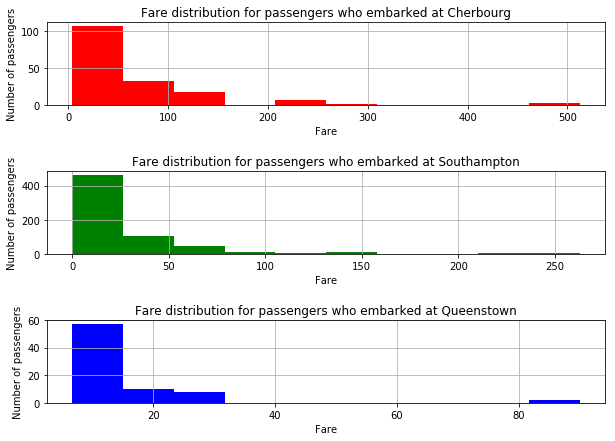

In [29]:
print('fare:')
print("min -", min(df['Fare']), "\nmax -", max(df['Fare']), "\nmean -", df['Fare'].mean())
embarked_in_southampton = df[df['Embarked'] == 'S']
print("Southampton: min - ", min(embarked_in_southampton['Fare']), "\nmax -",
      max(embarked_in_southampton['Fare']), "\nmean -", embarked_in_southampton['Fare'].mean())
plt.figure(figsize=(10, 7))
plt.subplot(311)
plt.title('Fare distribution for passengers who embarked at Cherbourg')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
df[df['Embarked'] == 'C']['Fare'].hist(color='red')
plt.subplot(312)
plt.title('Fare distribution for passengers who embarked at Southampton')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
df[df['Embarked'] == 'S']['Fare'].hist(color='green')
plt.subplot(313)
plt.title('Fare distribution for passengers who embarked at Queenstown')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
df[df['Embarked'] == 'Q']['Fare'].hist(color='blue')
plt.subplots_adjust(hspace = 0.8)
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [30]:
# PassengerId - то же самое, что номер строки в таблице
# Name, Ticket, Cabin - у каждого (почти) пассажира свои и не имеют особого смысла
names = df['Name'] # сохраним имена для одного из следующих заданий
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [31]:
df.isnull().any().any()

True

In [32]:
for k in df.columns:
    print(k, 891 - df[k].count()) # количество NaN в каждом столбце

Survived 0
Pclass 0
Sex 0
Age 177
SibSp 0
Parch 0
Fare 0
Embarked 2


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [33]:
df['Age'] = df['Age'].fillna(df['Age'].mean()) # пропуски в возрастах заполним средним значением
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # пропуски в портах заполним самым частым значением
df.isnull().any().any()

False

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

0.09156609328505759


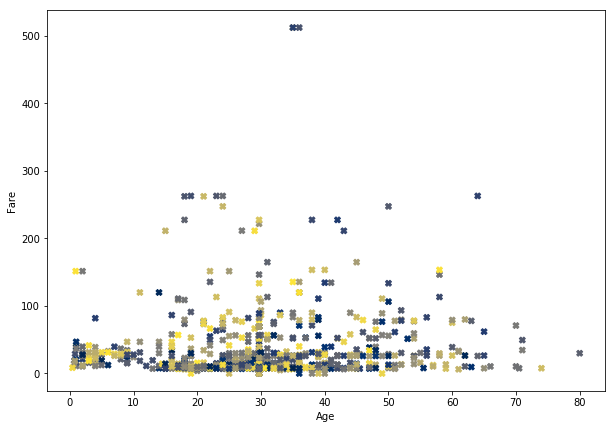

In [34]:
print(df['Fare'].corr(df['Age'])) # найдем коэффициент корреляции
plt.figure(figsize=(10,7))
plt.scatter(df['Age'], df['Fare'], marker='X', c=np.random.rand(891), cmap='cividis')
plt.ylabel("Fare")
plt.xlabel("Age")
plt.show()

Таким образом, возраст пассажира и цена за его билет связаны не очень сильно.

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

correlation coefficient between fare and survival: 0.25730652238496227
mean value of survived passengers' fare: 48.39540760233917
mean value of deceased passengers' fare: 22.117886885245877


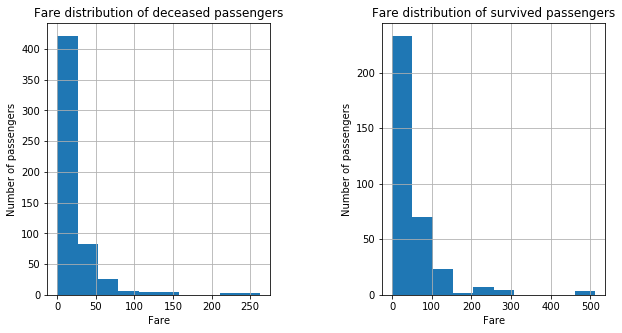

In [35]:
print('correlation coefficient between fare and survival:', df['Survived'].corr(df['Fare']))
print("mean value of survived passengers' fare:", df[df['Survived'] == 1]['Fare'].mean())
print("mean value of deceased passengers' fare:", df[df['Survived'] == 0]['Fare'].mean())
# построим графики распределения стоимости билетов для выживших и умерших пассажиров
plt.figure(figsize=(10, 5))
plt.subplot(122)
plt.title('Fare distribution of survived passengers')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
df[df['Survived'] == 1]['Fare'].hist()
plt.subplot(121)
plt.title('Fare distribution of deceased passengers')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
df[df['Survived'] == 0]['Fare'].hist()
plt.subplots_adjust(wspace = 0.5)
plt.show()

По графикам и коэффициенту корреляции видно, что зависимость есть. Также верно, что в среднем билеты выживших пассажиров стоили дороже билетов умерших.

In [36]:
print('correlation between Pclass and survival:', df['Survived'].corr(3 - df['Pclass']))
# построим таблицу, показывающую доли выживших пассажиров, ехавших каждым классом
pd.crosstab(df['Pclass'], df['Survived'], margins=True, normalize='index') 

correlation between Pclass and survival: 0.33848103596101475


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


Зависимость сильнее, чем в предыдущем случае, т. к. модуль коэффициента корреляции больше. Соответственно, чем выше класс, которым ехал пассажир, тем с большей вероятностью он выживал. Это же подтверждается в таблице.

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [37]:
df['Fam'] = df['SibSp'] + df['Parch'] + 1
# добавим признак, разделяющий возраста пассажиров на 4 группы
print(pd.cut(df['Age'], 4).unique())

[(20.315, 40.21], (40.21, 60.105], (0.34, 20.315], (60.105, 80.0]]
Categories (4, interval[float64]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]


In [38]:
df.loc[df['Age'] <= 20, 'AgeCat'] = 1
df.loc[(df['Age'] > 20) & (df['Age'] <= 40), 'AgeCat'] = 2
df.loc[(df['Age'] > 40) & (df['Age'] <= 60), 'AgeCat'] = 3
df.loc[(df['Age'] > 60) & (df['Age'] <= 80), 'AgeCat'] = 4
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam,AgeCat
0,0,3,male,22.0,1,0,7.2500,S,2,2.0
1,1,1,female,38.0,1,0,71.2833,C,2,2.0
2,1,3,female,26.0,0,0,7.9250,S,1,2.0
3,1,1,female,35.0,1,0,53.1000,S,2,2.0
4,0,3,male,35.0,0,0,8.0500,S,1,2.0


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [39]:
# найдем самую частую фамилию на корабле
surnames = names.str.split(', ', expand=True)[0]
print(surnames.mode()[0]) 

Andersson


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

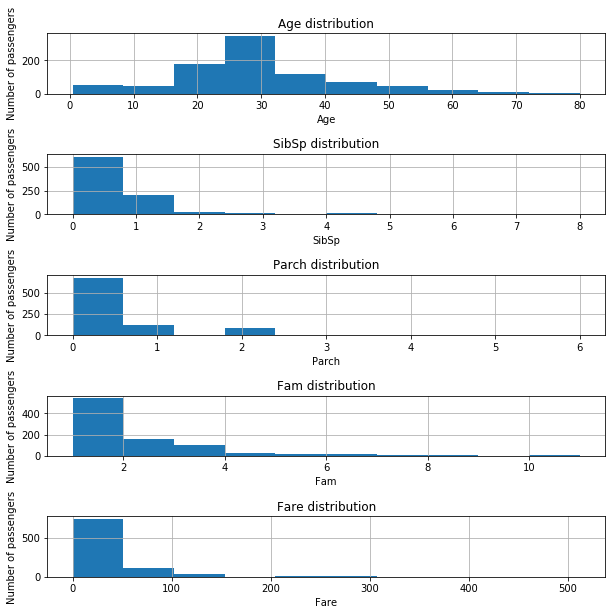

In [40]:
plt.figure(figsize=(10, 10))
plt.subplot(511)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
df['Age'].hist()
plt.subplot(512)
plt.title('SibSp distribution')
plt.xlabel('SibSp')
plt.ylabel('Number of passengers')
df['SibSp'].hist()
plt.subplot(513)
plt.title('Parch distribution')
plt.xlabel('Parch')
plt.ylabel('Number of passengers')
df['Parch'].hist()
plt.subplot(514)
plt.title('Fam distribution')
plt.xlabel('Fam')
plt.ylabel('Number of passengers')
df['Fam'].hist()
plt.subplot(515)
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
df['Fare'].hist()
plt.subplots_adjust(hspace = 1)
plt.show()

Видно, что диапазоны значений, принимаемых признаками, разнятся. Это может быть плохо, например, для метрических алгоритмов: по умолчанию чаще всего берется евклидова метрика, в которой наибольшую роль будет играть признак, принимающий максимальные значения из всех, а другие практически не будут учитываться. Чтобы улучшить работу алгоритма, отнормируем признаки.

In [41]:
df['Age'] = normalize(np.array(df['Age']).reshape(891, 1))
df['SibSp'] = normalize(np.array(df['SibSp']).reshape(891, 1))
df['Parch'] = normalize(np.array(df['Parch']).reshape(891, 1))
df['Fam'] = normalize(np.array(df['Fam']).reshape(891, 1))
df['Fare'] = normalize(np.array(df['Fare']).reshape(891, 1))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam,AgeCat
0,0,3,male,-0.592481,0.432793,-0.473674,-0.502445,S,0.059160,2.0
1,1,1,female,0.638789,0.432793,-0.473674,0.786845,C,0.059160,2.0
2,1,3,female,-0.284663,-0.474545,-0.473674,-0.488854,S,-0.560975,2.0
3,1,1,female,0.407926,0.432793,-0.473674,0.420730,S,0.059160,2.0
4,0,3,male,0.407926,-0.474545,-0.473674,-0.486337,S,-0.560975,2.0


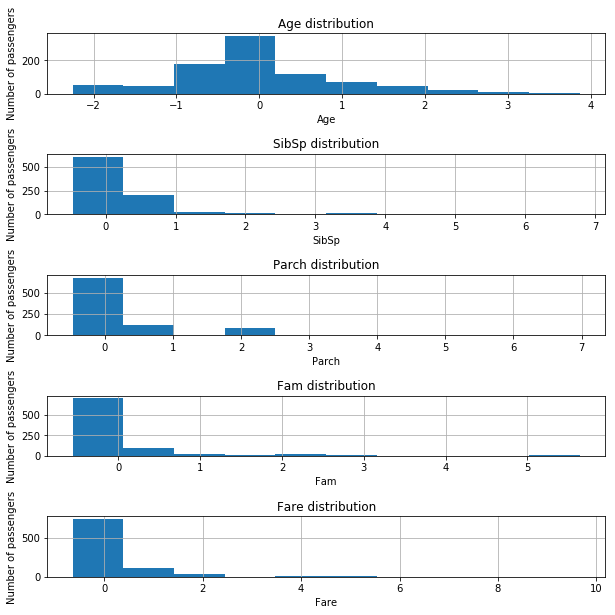

In [42]:
plt.figure(figsize=(10, 10))
plt.subplot(511)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
df['Age'].hist()
plt.subplot(512)
plt.title('SibSp distribution')
plt.xlabel('SibSp')
plt.ylabel('Number of passengers')
df['SibSp'].hist()
plt.subplot(513)
plt.title('Parch distribution')
plt.xlabel('Parch')
plt.ylabel('Number of passengers')
df['Parch'].hist()
plt.subplot(514)
plt.title('Fam distribution')
plt.xlabel('Fam')
plt.ylabel('Number of passengers')
df['Fam'].hist()
plt.subplot(515)
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
df['Fare'].hist()
plt.subplots_adjust(hspace = 1)
plt.show()

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [43]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df['Embarked'] = df['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

In [44]:
df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam,AgeCat
0,0,3,0,-0.592481,0.432793,-0.473674,-0.502445,1,0.059160,2.0
1,1,1,1,0.638789,0.432793,-0.473674,0.786845,2,0.059160,2.0
2,1,3,1,-0.284663,-0.474545,-0.473674,-0.488854,1,-0.560975,2.0
3,1,1,1,0.407926,0.432793,-0.473674,0.420730,1,0.059160,2.0
4,0,3,0,0.407926,-0.474545,-0.473674,-0.486337,1,-0.560975,2.0
